# Stock prediction model

# installing libraries

In [1]:
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install xgboost
! pip install scikit-learn
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


# importing dataset

In [3]:
df = pd.read_csv('tesla.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.2667,1.6667,1.1693,1.5927,23.889999,281494500
1,30-06-2010,1.7193,2.0279,1.5533,1.5887,23.830000,257806500
2,01-07-2010,1.6667,1.7280,1.3513,1.4640,21.959999,123282000
3,02-07-2010,1.5333,1.5400,1.2473,1.2800,19.200001,77097000
4,06-07-2010,1.3333,1.3333,1.0553,1.0740,16.110001,103003500


In [4]:
df.shape

(3481, 7)

In [5]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3481.000000,3481.000000,3481.000000,3481.00000,3481.000000,3.481000e+03
mean,73.221942,74.852059,71.501041,73.19797,267.363883,9.668865e+07
std,101.979494,104.290529,99.500242,101.89666,159.348506,7.898956e+07
min,1.076000,1.108700,0.998700,1.05330,15.800000,1.777500e+06
25%,11.238000,11.454000,10.890700,11.13400,167.009995,4.683000e+07
50%,17.222000,17.497300,16.900000,17.20000,258.000000,8.216362e+07
75%,141.263300,144.643300,138.333300,141.41000,404.046039,1.225744e+08
max,411.470000,414.496700,405.666700,409.97000,780.000000,9.140814e+08


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3481 non-null   object 
 1   Open       3481 non-null   float64
 2   High       3481 non-null   float64
 3   Low        3481 non-null   float64
 4   Close      3481 non-null   float64
 5   Adj Close  3481 non-null   float64
 6   Volume     3481 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 190.5+ KB


# Exploratory Data Analysis

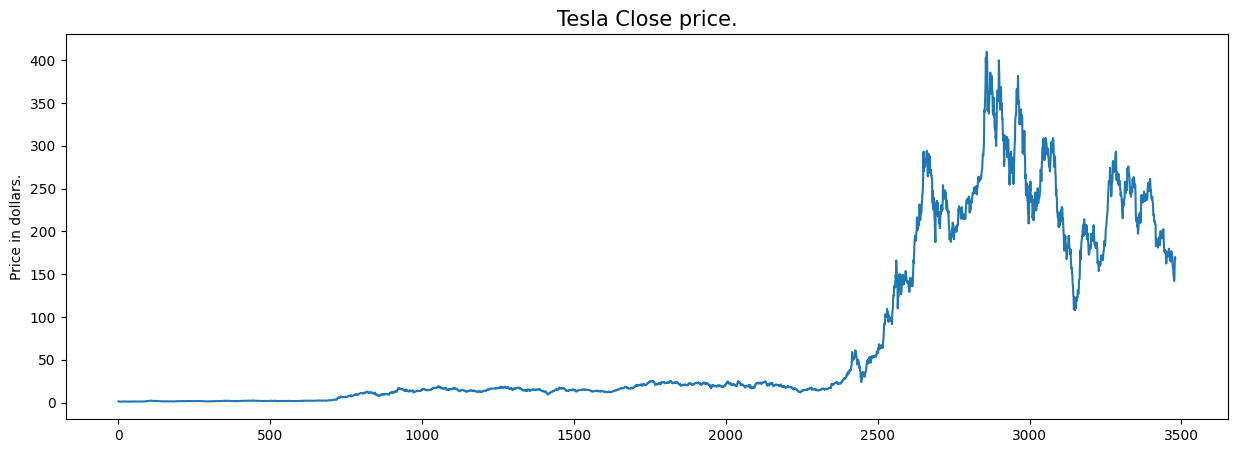

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [8]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.2667,1.6667,1.1693,1.5927,23.889999,281494500
1,30-06-2010,1.7193,2.0279,1.5533,1.5887,23.830000,257806500
2,01-07-2010,1.6667,1.7280,1.3513,1.4640,21.959999,123282000
3,02-07-2010,1.5333,1.5400,1.2473,1.2800,19.200001,77097000
4,06-07-2010,1.3333,1.3333,1.0553,1.0740,16.110001,103003500


In [9]:
df[df['Close'] == df['Adj Close']].shape


(0, 7)

In [10]:
df = df.drop(['Adj Close'], axis=1)


In [11]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

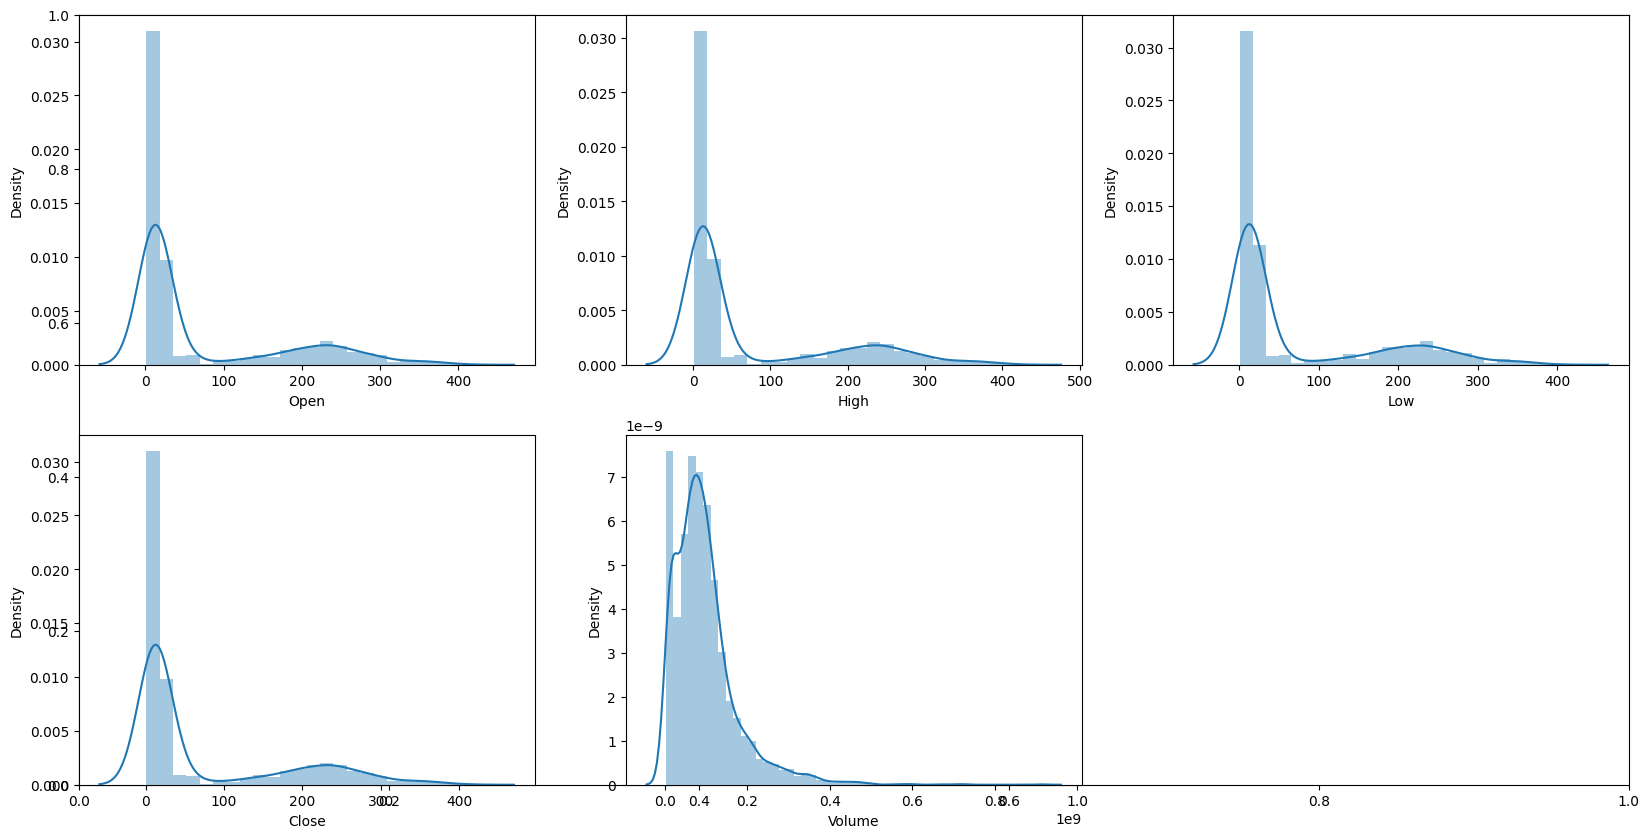

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


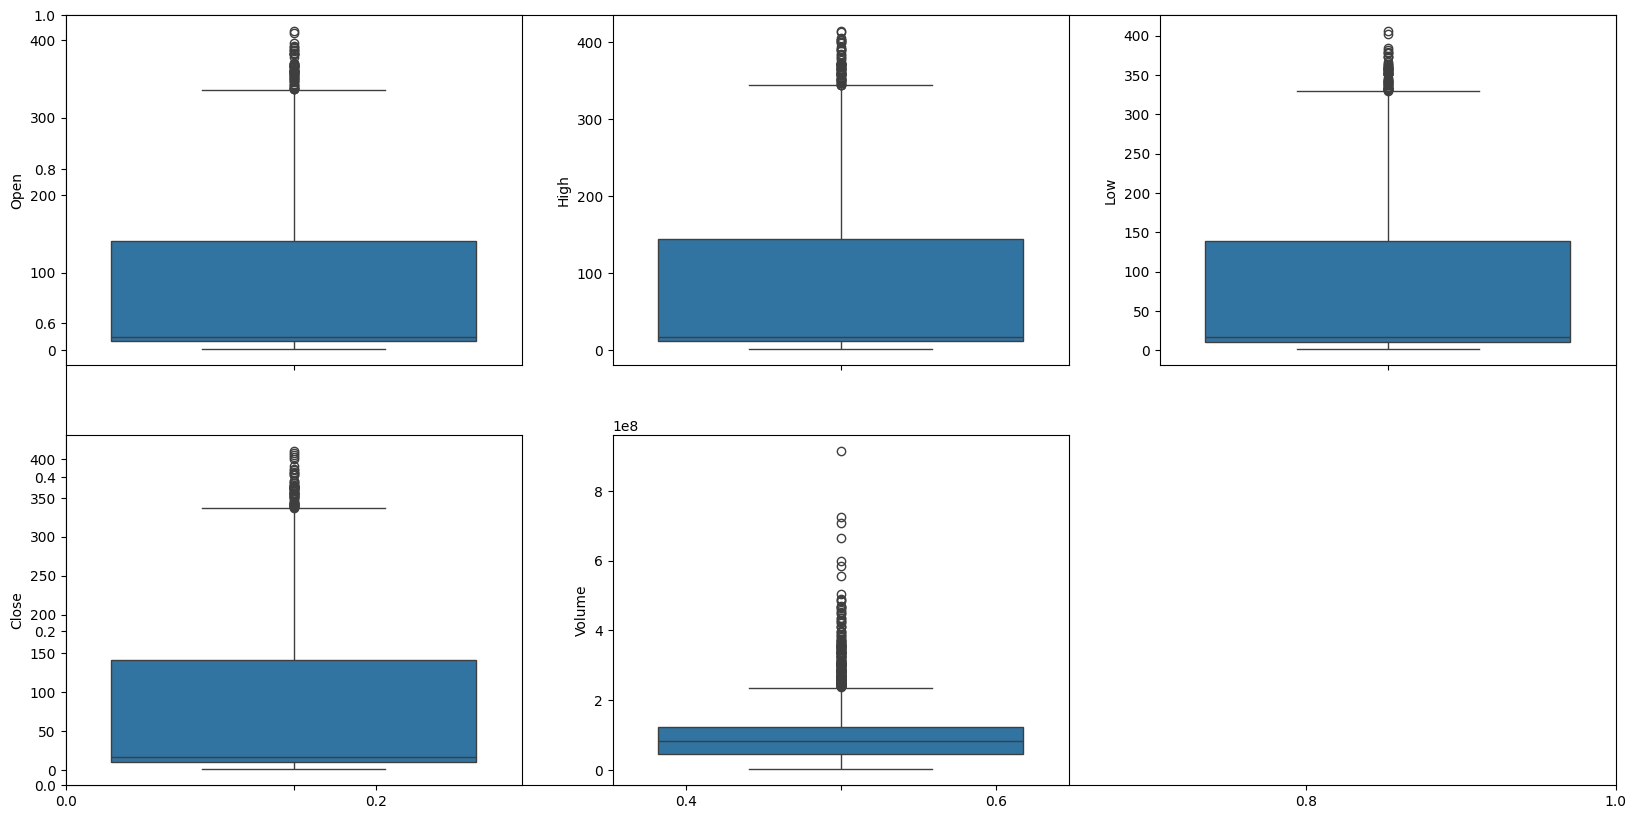

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


# Feature Engineering

In [14]:
# Split the 'Date' column into separate parts
splitted = df['Date'].str.split('/', expand=True)

# Check if the split operation resulted in three parts
if splitted.shape[1] == 3:
    # Assign the split parts to 'month', 'day', and 'year' columns
    df['month'] = splitted[0].astype('int')
    df['day'] = splitted[1].astype('int')
    df['year'] = splitted[2].astype('int')
else:
    # Handle the case where the split did not result in three parts
    print("Error: Some dates may not be in the expected 'month/day/year' format.")

# Display the first few rows of the DataFrame
df.head()


Error: Some dates may not be in the expected 'month/day/year' format.


,Date,Open,High,Low,Close,Volume
0,29-06-2010,1.2667,1.6667,1.1693,1.5927,281494500
1,30-06-2010,1.7193,2.0279,1.5533,1.5887,257806500
2,01-07-2010,1.6667,1.7280,1.3513,1.4640,123282000
3,02-07-2010,1.5333,1.5400,1.2473,1.2800,77097000
4,06-07-2010,1.3333,1.3333,1.0553,1.0740,103003500


In [15]:
# Convert the 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Now that 'Date' is in datetime format, you can extract the month
df['month'] = df['Date'].dt.month

# Create the 'is_quarter_end' column
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)

# Display the first few rows of the DataFrame
df.head()


,Date,Open,High,Low,Close,Volume,month,is_quarter_end
0,2010-06-29,1.2667,1.6667,1.1693,1.5927,281494500,6,1
1,2010-06-30,1.7193,2.0279,1.5533,1.5887,257806500,6,1
2,2010-07-01,1.6667,1.7280,1.3513,1.4640,123282000,7,0
3,2010-07-02,1.5333,1.5400,1.2473,1.2800,77097000,7,0
4,2010-07-06,1.3333,1.3333,1.0553,1.0740,103003500,7,0


In [16]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Now that 'Date' is in datetime format, you can extract the month
df['month'] = df['Date'].dt.month

# Create the 'is_quarter_end' column
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)

# Display the first few rows of the DataFrame
df.head()


,Date,Open,High,Low,Close,Volume,month,is_quarter_end
0,2010-06-29,1.2667,1.6667,1.1693,1.5927,281494500,6,1
1,2010-06-30,1.7193,2.0279,1.5533,1.5887,257806500,6,1
2,2010-07-01,1.6667,1.7280,1.3513,1.4640,123282000,7,0
3,2010-07-02,1.5333,1.5400,1.2473,1.2800,77097000,7,0
4,2010-07-06,1.3333,1.3333,1.0553,1.0740,103003500,7,0


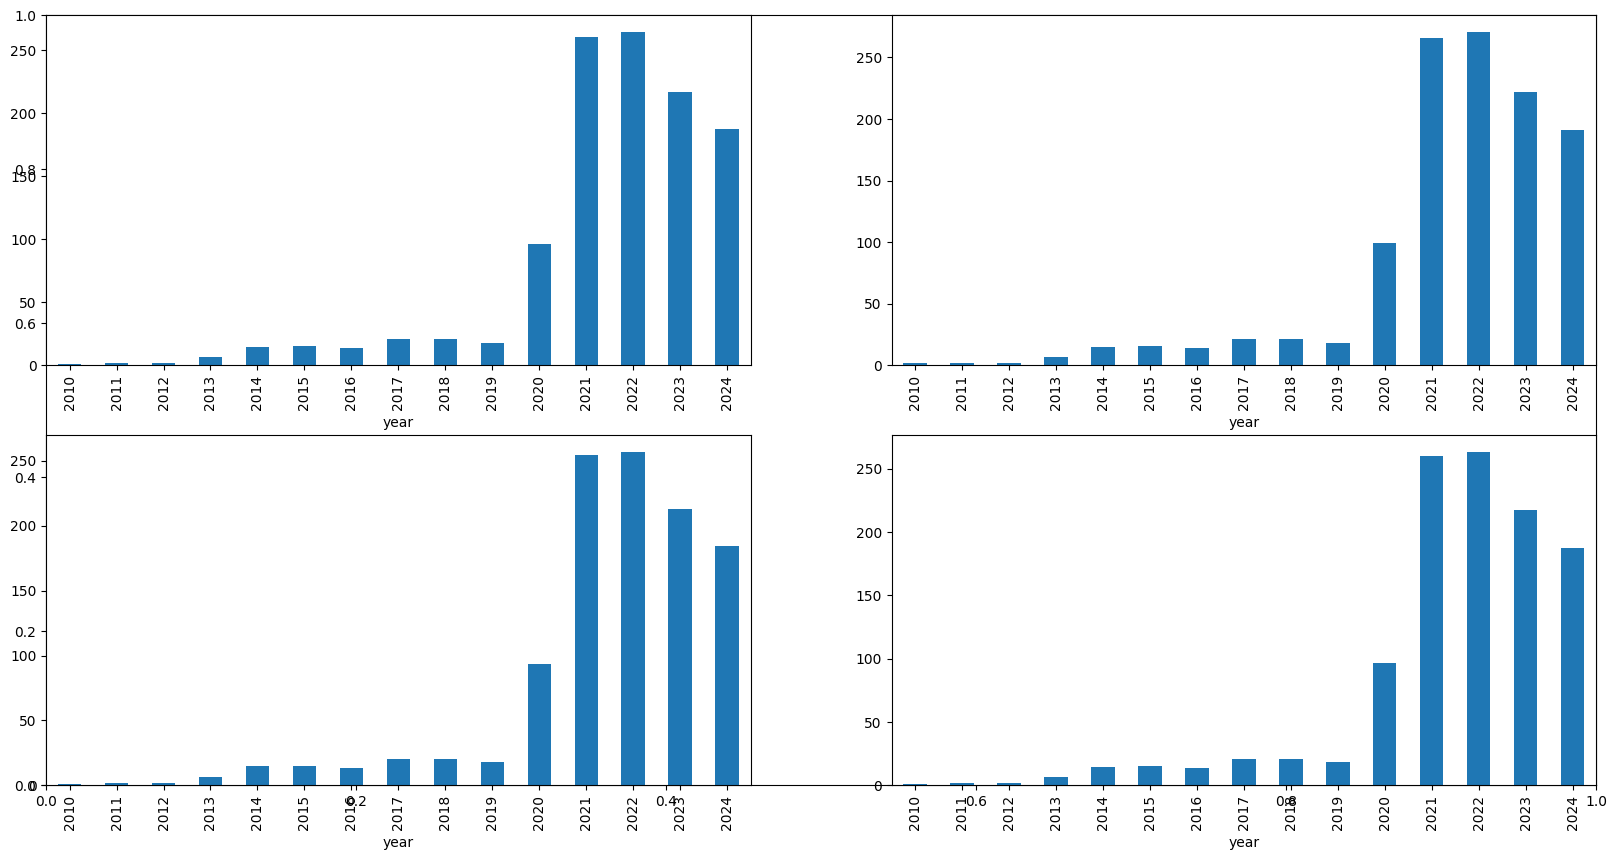

In [17]:
# Assuming 'date_column' is the name of your column with datetime information:
# Convert the 'date_column' to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'date_column'
df['year'] = df['Date'].dt.year

# Now you can group by 'year' and calculate the mean
data_grouped = df.groupby('year').mean()

# Plotting
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [18]:
df.groupby('is_quarter_end').mean()


,Date,Open,High,Low,Close,Volume,month,year
is_quarter_end,,,,,,,,
0,2017-05-19 11:55:01.554404096,72.716117,74.304772,70.993144,72.677729,9.817913e+07,6.101900,2016.916667
1,2017-06-11 15:54:13.905579520,74.227514,75.940056,72.510732,74.232199,9.372562e+07,7.462661,2016.866953


In [19]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


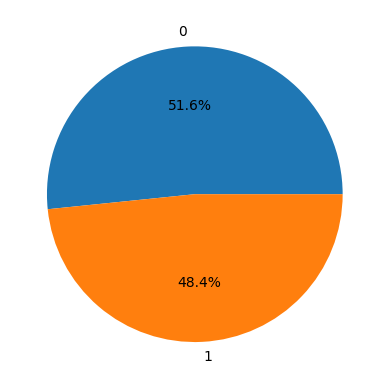

In [20]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


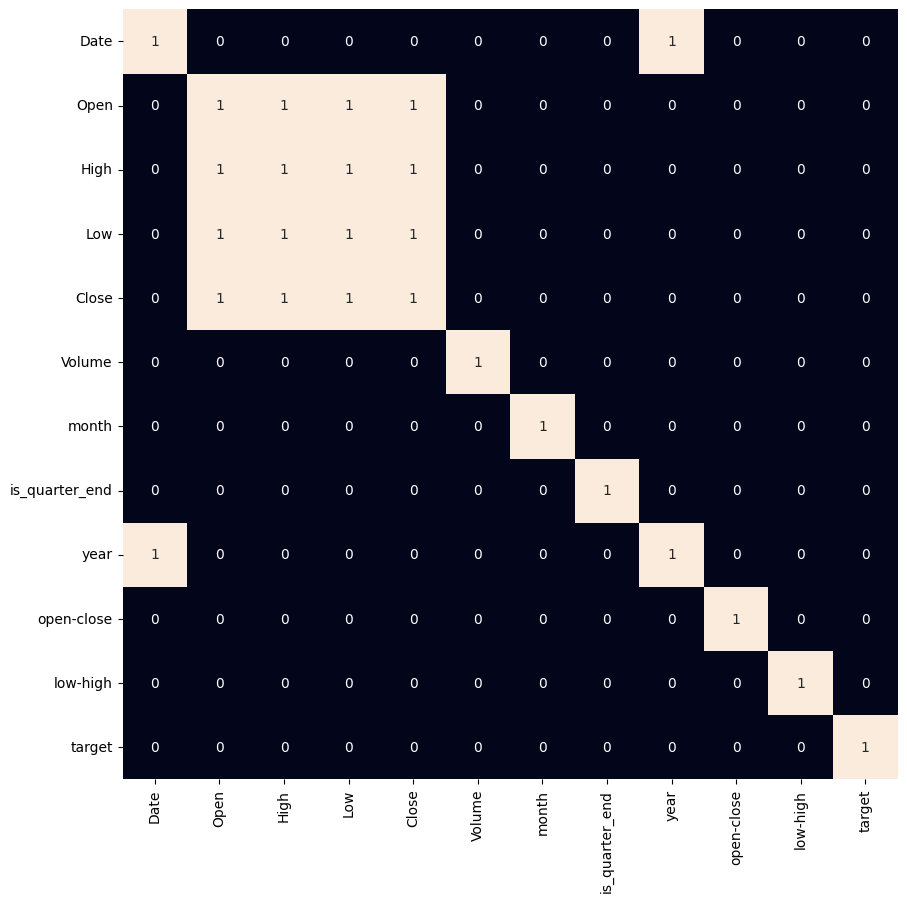

In [21]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


# data splitting and normalization

In [22]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(3132, 3) (349, 3)


In [23]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
	    Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5125716490299823
Validation Accuracy :  0.4790434896859808

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5008836713697824
Validation Accuracy :  0.5089015898042307

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

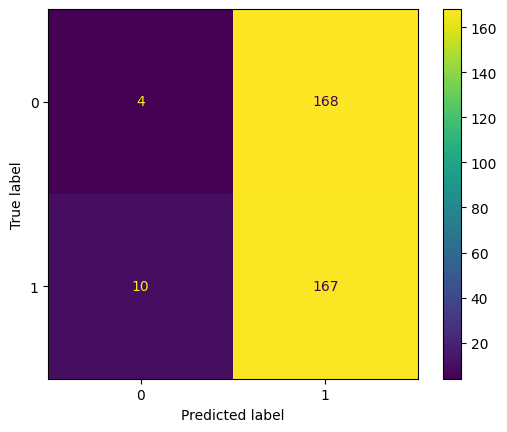

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming models[0] is your trained model, and X_valid and Y_valid are your validation data and labels
predictions = models[0].predict(X_valid)
cm = confusion_matrix(Y_valid, predictions)

# Now use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
